## Aula 07 - Pré-Processamento - Parte V

Objetivos da prática:
- Analisar ténicas simples para tratar desbalanceamento;
- Fazer conversão entre tipos;
- Normalizar os dados.



---
---

### Funções utilizadas na prática

DataFrame

- sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)


scikitlearn

- Procurar pelo módulo preprocessing


SciPy.stats

- zscore(a, axis=0, ddof=0)




---
---


## Prática V


---


**Escolha apenas UM dataset de CLASSIFACAÇÃO para realizar os exercícios abaixo. Caso você não tenha utilizado um dataset desse tipo anteriormente escolha um novo para essa prática.**


1- O desbalanceamento, em geral, causa problemas para a classificação. Trate o desbalanceamento utilizando as abordagens de subamostragem, superamostragem. Mostre a distribuição das classes após o balanceamento.

Para realizar a subamostragem e a superamostragem chame a função *sample* do DataFrame. Abaixo tem um exemplo de como utilizar essa função.

Utilize a função classificação definida abaixo ajustando o parâmetro *weights* para um valor que você ache adequado. Esse parâmetro faz com que o algoritmo de classificação leve em conta o peso da classe no processo de treinamento. Utilize 2 valores de *weights* diferentes e comente o resultado (o que você acha que mudou com esses valores diferentes de *weights*). 


2- Faça a conversão entre tipos para dois atributos. Escolha as conversões que achar mais adequada, quantitativo para qualitativo ou qualitativo para quantitativo. Explique o que você fez e porque achou essa a melhor forma de fazer.
Para referência consulte os slides 9-21.

Esse tipo de conversão é importante pois se você for utilizar uma rede neural artificial. Quando temos uma classe numérica como no wine, 0,1,2, é melhor transformar a classe em 3 colunas e a primeira coluna é 1 quando a classe for 0, a segunda coluna tem valor 1 quando a classe for 1, e a terceira coluna é 1 quando a classe for 2. Isso resulta numa rede neual com 3 neuronios na saída onde cada neurônio sinaliza uma das classes. Esse processo também ajuda na convergencia da rede neural artificial.
    
    
3- Realize a normalização de duas colunas. Para normalizar utilize a abordagem 0-1 (slide 27) e z-score (slide 29).
Apresente métricas que comprove que a normalização foi realizada (boxplot, histograma, ...).



OBS: A etapa de pré-processamento deve ser feita pensando nos passos seguintes. Por exemplo, se penso em utilizar posteriormente um algoritmo de classificação que necessita atributos numéricos no intervalo 0-1 sei que preciso remover os atributos não numéricos, ou transformá-los em numéricos, e fazer a normalização 0-1. 
Outro exemplo é o das funções simples mostradas no slide 24, o log e a raíz quadrada aproximam os dados de uma normal, logo se sua abordagem supoe normalidade dos dados pode ser interessante aplicar alguma dessas funções.



---
## Entrega
A entrega da prática deve ser feita em formato de notebook do jupyter. Crie um notebook seu, nas primeiras linhas identifique os membros da dupla, salve o notebook com o nome pratica_2_nUSP1_nUSP2.
Submeta no tidia apenas o arquivo do notebook .ipynb, não crie pastas para separar as práticas, apenas faça o upload do arquivo .ipynb
Não precisa fazer o upload dos datasets utilizados.
A resolução desta prática deve seguir a mesma maneira da anterior. No corpo da prática primeiro identifique qual o conjunto de dados escolhido e começe a responder as perguntas no corpo do notebook. Procure utilizar as caixas de texto para a discussão (o notebook tem caixas de texto e de código).






----
Exemplo de uso da função *sample*

In [75]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets

wine = datasets.load_wine()
target_names = wine['target_names']
wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

# mostrar a quantidade de exemplos de cada classe
print('Distribuição de classes original')
print(wine.iloc[:, [0,-1]].groupby('target').count())
# temos 59 exemplos da classe 0.0, 71 da classe 1.0 e 48 da classe 2.0

# agora amostrando para deixar dataset balanceado

# podemos utilizar o parâmetro n ou frac, olhar documentação
total = len(wine)

# dicionario com a probabilidade das classes
probs = {0: 59/total, 1: 71/total, 2: 48/total}
# para utilizar o parametro weight é preciso passar um vetor com a probabilidade para cada amostra
sample_probs = wine.target.copy()
for c in wine.target.unique():
    sample_probs[sample_probs == c] = probs[c]
dt_bl = wine.sample(frac=1, replace=True, weights=sample_probs.tolist())
print('\nDistribuição de classes amostrada mas com as mesmas probs da original')
print(probs)
print(dt_bl.iloc[:, [0,-1]].groupby('target').count())

# mudando para probabilidade igual para todas as classes
probs = {0: 1-59/total, 1: 1-71/total, 2: 1-48/total}
probs = {0: 1/4, 1: 1/4, 2: 1/2}
probs = {0: 1, 1: 1, 2: 1}
#probs = {0: 0.1, 1: 0.1, 2: 0.8}
# para utilizar o parametro weight é preciso passar um vetor com a probabilidade para cada amostra
sample_probs = wine.target.copy()
for c in wine.target.unique():
    sample_probs[sample_probs == c] = probs[c]
dt_bl = wine.sample(frac=1, replace=True, weights=sample_probs)
print('\nDistribuição de classes amostrada com probs iguais')
#print(sample_probs.tolist())
#print(probs)
#print(np.sum(list(probs.values())))
print(dt_bl.iloc[:, [0,-1]].groupby('target').count())


# Atenção mesmo colocando um valor para a probabilidade não tem-se a garantia
# de que o valor exato será escolhido pois há o fator do acaso nessa amostragem


# é possível também fazer uma amostragem por classe criando dataframes diferentes e concatenando depois
# dessa forma é possível selecionar um número desejado de amostras por classe
# essa é uma das forma de se realizar a sub e superamostragem
dt_bl = [wine.loc[wine.target == c, :].sample(n=50, replace=True) for c in wine.target.unique()]
print('\n\nFixando o número de exemplos por classe em 50')
#print(sample_probs.tolist())
#print(probs)
#print(np.sum(list(probs.values())))
dt_bl = pd.concat(dt_bl)
print(dt_bl.iloc[:, [0,-1]].groupby('target').count())




Distribuição de classes original
        alcohol
target         
0.0          59
1.0          71
2.0          48

Distribuição de classes amostrada mas com as mesmas probs da original
{0: 0.33146067415730335, 1: 0.398876404494382, 2: 0.2696629213483146}
        alcohol
target         
0.0          59
1.0          85
2.0          34

Distribuição de classes amostrada com probs iguais
        alcohol
target         
0.0          63
1.0          74
2.0          41


Fixando o número de exemplos por classe em 50
        alcohol
target         
0.0          50
1.0          50
2.0          50


---
Definição da função classificacao

In [63]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std


def classificacao(data, columns, target, weights):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    weights:    Dicionário. Pesos das classes, cada chave do dicionário é a classe e seu valor a probabilidade
    ---------------------------------------------------------------
    Realiza a classificação em 3 modelos (SVM com kernel linear, 
    SVM com kernel polinomial de grau 3, Árvore de decisão)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    
    # inicializa os modelos com os parâmetros solicitados
    svm_l = SVC(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6, class_weight=weights)
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6, class_weight=weights)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1), class_weight=weights)
    
    clfs = [svm_l, svm_n, dt]
    clfs_names = ['svm_linear', 'svm_poly', 'dt']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'svm_linear':[], 'svm_poly':[], 'dt':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( clf.score(x_test, y_test) )
    
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - acurácia'
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}



---
Exemplo de uso da função classificacao com o parametro weights

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
13


/usr/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


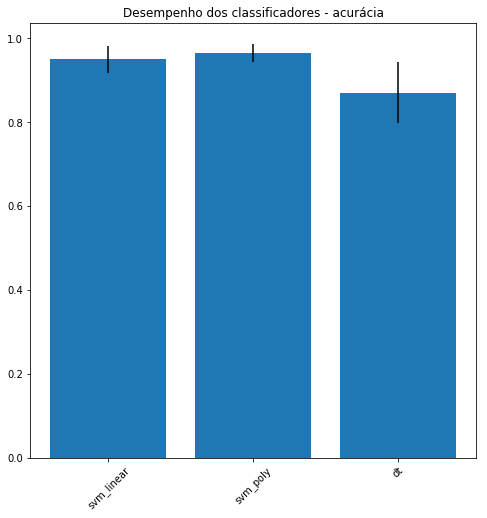

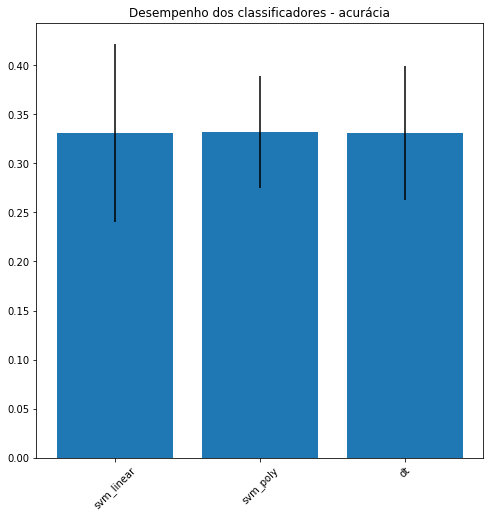

In [74]:
# EXEMPLO DE CLASSIFICACAO

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets

wine = datasets.load_wine()
target_names = wine['target_names']
wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

target = len(wine.columns) -1
columns = list(range(target))


#columns = [0,1,2]
#target = 3
#dataset = wine.iloc[:, [0,1,1, target]]

print(columns)
print(target)

# classe 0 com probabilidade 98%, classes 1 e 2 com probs 1%
clf = classificacao(wine, columns, target, weights={0:0.98, 1:0.01, 2:0.01})


# classe 0 com probabilidade 100%, classes 1 e 2 com probs 0%
clf = classificacao(wine, columns, target, weights={0:1, 1:0, 2:0})
